In [1]:
# General:
#import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For number computing
import pickle
import networkx as nx
# For plotting and visualization:
#from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Read file of users' polarity score
user_average= pd.read_pickle('User_average_polarity.pkl', compression='zip')
#Read file of friends' polarity score
Friends_average=pd.read_pickle('Friends_average_polarity.pkl', compression='zip')
#Read file with the relation between users and friends
following_relations=pd.read_pickle('All_following.pkl', compression='zip')
#Read file with the users' and friends' polarity scores
summary= pd.read_csv('user_summary.csv')

In [8]:
def polarity(polarity_score):
    if polarity_score >= 0.01  :
        return 'Positive'
    elif ( polarity_score < 0.01) & (polarity_score > -0.01) :
        return 'Neutral'
    else :#polarity_score <= -0.01
        return 'Negative'

In [9]:
#Get the polarity label of users
user_average['Kind of person']= np.array([polarity(score) for score in user_average['polarity']])
user_average

AttributeError: 'DataFrame' object has no attribute '_data'

In [5]:
#Get the polarity label of friends
Friends_average['Kind of person']=  np.array([polarity(score) for score in Friends_average['polarity'] ])
Friends_average

AttributeError: 'DataFrame' object has no attribute '_data'

<AxesSubplot:ylabel='polarity'>

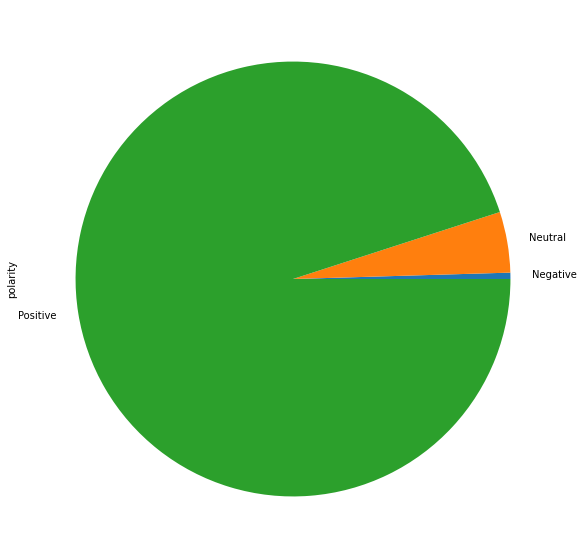

In [38]:
#Pie chart of polarity labels of users
user_average.groupby('Kind of person').count()["polarity"].plot(kind='pie', figsize=(10, 10))

<AxesSubplot:title={'center':"Polarity of Tweet's users"}, xlabel='Kind of person'>

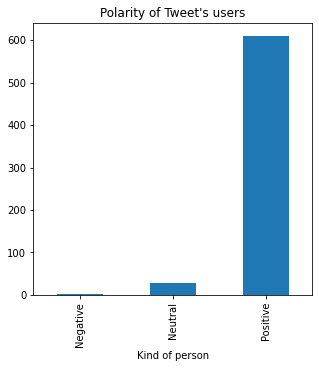

In [39]:
#bar chart of polarity labels of users
user_average.groupby('Kind of person')['polarity'].count().plot.bar(title="Polarity of Tweet's users", figsize=(5,5))


In [40]:
#Add to the summary the users' and friends' polarity labels
summary['User polarity']=  np.array([polarity(score) for score in summary['polarity'] ])
summary['Friends polarity']=  np.array([polarity(score) for score in summary['friends_polarity'] ])
summary

,user_id,retweet_count,favourite_count,polarity,friends_polarity,num_friends,User polarity,Friends polarity
0,52,40.888325,0.223350,0.117393,0.138767,93,Positive,Positive
1,35563,3916.233696,2.135870,0.101799,0.141106,525,Positive,Positive
2,1861461,156.466292,0.651685,0.126889,0.146308,836,Positive,Positive
3,5677342,609.335079,0.492147,0.176223,0.151523,407,Positive,Positive
4,6678622,328.617801,0.026178,0.014952,0.142167,576,Positive,Positive
...,...,...,...,...,...,...,...,...
595,2813674754,16035.970760,0.368421,0.108683,0.107240,209,Positive,Positive
596,2816038718,23303.826923,0.509615,0.093797,0.110609,51,Positive,Positive
597,2834237124,3255.654088,0.905660,0.117564,0.125597,169,Positive,Positive
598,2857164524,30.690722,0.077320,0.176345,0.111780,29,Positive,Positive


In [41]:
#Check if the user and its friends have the same polarity label
summary["equal"] = np.where(summary['User polarity'] == summary['Friends polarity'], True, False)
summary

,user_id,retweet_count,favourite_count,polarity,friends_polarity,num_friends,User polarity,Friends polarity,equal
0,52,40.888325,0.223350,0.117393,0.138767,93,Positive,Positive,True
1,35563,3916.233696,2.135870,0.101799,0.141106,525,Positive,Positive,True
2,1861461,156.466292,0.651685,0.126889,0.146308,836,Positive,Positive,True
3,5677342,609.335079,0.492147,0.176223,0.151523,407,Positive,Positive,True
4,6678622,328.617801,0.026178,0.014952,0.142167,576,Positive,Positive,True
...,...,...,...,...,...,...,...,...,...
595,2813674754,16035.970760,0.368421,0.108683,0.107240,209,Positive,Positive,True
596,2816038718,23303.826923,0.509615,0.093797,0.110609,51,Positive,Positive,True
597,2834237124,3255.654088,0.905660,0.117564,0.125597,169,Positive,Positive,True
598,2857164524,30.690722,0.077320,0.176345,0.111780,29,Positive,Positive,True


<AxesSubplot:title={'center':'Polarity homophily'}, xlabel='equal'>

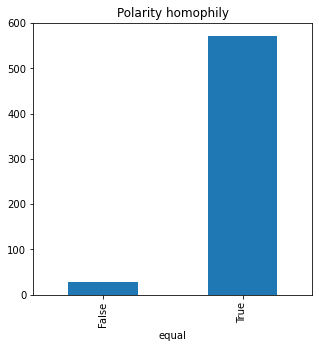

In [42]:
#Bar plot of similarity in polarity label between user and its friends
summary.groupby('equal')['user_id'].count().plot.bar(title="Polarity homophily", figsize=(5,5))

In [43]:
#user = following_relations.loc[following_relations['id'] == 2857164524]
user_id =  2816038718 #2857164524
friends_list = following_relations.loc[following_relations['id']  == user_id,'followingid'].values
friends_polarity = Friends_average.loc[Friends_average['user_id'].isin(friends_list),'Kind of person']
friends_polarity= friends_polarity.to_frame().reset_index()


user = pd.DataFrame({'user_id': [user_id]})
user_repeated = pd.concat([user]*len(friends_polarity), ignore_index=True)

#user_list = following_relations.loc[following_relations['id']  == user_id,'id'].values
#user_polarity = Friends_average.loc[user_average['user_id'].isin(user_list),'polarity']
user_polarity = user_average.loc[user_average['user_id']== user_id, 'Kind of person'].values

user_polarity= pd.DataFrame({'user_polarity': user_polarity})

user_polarity_repeated = pd.concat([user_polarity]*len(friends_polarity), ignore_index=True)

df = pd.concat([user_repeated, user_polarity_repeated , friends_polarity], axis = 1)
df.rename(columns={'index': 'friend'}, inplace=True)
df

,user_id,user_polarity,friend,Kind of person
0,2816038718,Positive,40115,Positive
1,2816038718,Positive,45667,Positive
2,2816038718,Positive,49796,Positive
3,2816038718,Positive,76670,Positive
4,2816038718,Positive,87878,Positive
5,2816038718,Positive,98818,Negative
6,2816038718,Positive,105962,Positive
7,2816038718,Positive,107225,Positive
8,2816038718,Positive,112996,Positive
9,2816038718,Positive,122970,Positive


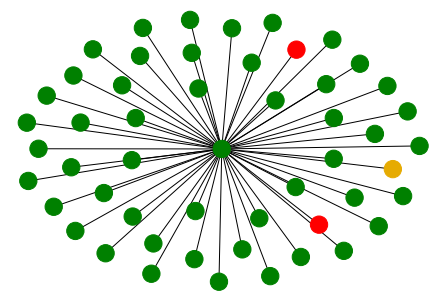

In [51]:
# Build your graph
G=nx.from_pandas_edgelist(df, 'user_id', 'friend')
cbbPalette = ["#008000", "#FF0000", "#E6AB02", "#F0E442"]
values = np.where(df['Kind of person']== 'Positive' , cbbPalette[0], 
         np.where(df['Kind of person']== 'Negative', cbbPalette[1],
         np.where(df['Kind of person']== 'Neutral', cbbPalette[2], cbbPalette[3])))

values = np.append(cbbPalette[0],values)
# Plot it
nx.draw(G, with_labels=False, node_color = values)
plt.show()